# Weatherdata for IPM Plateform

## 1. import weather data modules

In [1]:
from weatherdata.ipm import WeatherDataHub 

## 2. Access to weatherdatasource available on the platefom

In [2]:
ws=WeatherDataHub()

In [3]:
ws.list_resources()

{'Met Norway Locationforecast': '9-day forecasts for the entire planet. 2.5 km resolution in the Nordic-Baltic region, 9km elsewhere',
 'Met Éireann Locationforecast': '9-day forecasts for the Ireland.',
 'DMI Pointweather service': 'Seasonal weather data and forecasts for Denmark. Grid based',
 'SLU Lantmet service': 'Seasonal weather data and forecasts for Sweden. Grid based',
 'Deutsche Wetterdienst location forecast by IPM Decisions': "27 hour weather forecasts for Germany and surrounding areas. 2.5 km resolution. Pulls data from DWD's Open Data server (https://www.dwd.de/EN/ourservices/opendata/opendata.html). Made available by a custom adapter created by Met Norway and NIBIO.",
 'Deutsche Wetterdienst EU Area location forecast by IPM Decisions': "30 hour weather forecasts for EU. 7 km resolution. Pulls data from DWD's Open Data server (https://www.dwd.de/EN/ourservices/opendata/opendata.html). Made available by a custom adapter created by Met Norway and NIBIO.",
 'Euroweather sea

## 3. Get ressource for a specific weatherdataresource 

To connect to the meteo resource, simply enter the name of the meteo resource in the get_ressource function. 

In [4]:
fmi=ws.get_ressource(name='Finnish Meteorological Institute measured data')

Once connected to the resource various functions are available. You can check 
* the available stations for the resource with station_ids function. This function This function returns a dataframe of the stations available for the resource with their names, their identifiers and the coordinates of the station (latitude, longitude)
* the weather parameters accepted by the resource  with parameters function. This function return common and optional weather parameter 
* Get Weatherdata in xarray dataset with attribute or json format (more description of this function below)

In [5]:
fmi.station_ids()

,name,id,latitude,longitude
0,Alajärvi Möksy,101533,24.26,63.09
1,Asikkala Pulkkilanharju,101185,25.52,61.27
2,Enontekiö Kilpisjärvi Saana,102017,20.85,69.04
3,Enontekiö Kilpisjärvi,102016,20.79,69.05
4,Enontekiö Näkkälä,102019,23.58,68.6
...,...,...,...,...
203,Virolahti Koivuniemi,101231,27.67,60.53
204,Virrat Äijänneva,101310,23.54,62.33
205,Ylitornio Meltosjärvi,101908,24.65,66.53
206,Ylivieska airfield,101690,24.72,64.05


In [6]:
fmi.parameters()

{'common': [1002, 3002, 2001, 4003], 'optional': None}

### Get weather data

According to weather resources differents parameters can be used:
* *for historic weatherdata*
    * parameters: list of weather parameters available for the resource selected
    * station_id: list of station id available for the resource selected
    * timeStart: Start date of the request
    * timeEnd: End date of the request
    * timezone: The timezone
    * format: 'ds' to obtain a xarray dataset or 'json' to obtain the json     
    
    
* *for forecasts weather resources*
    * latitude: list of latitude
    * longitude: list of longitude
    * altitude: list of altitude

#### Example for historic weather ressources 
* for one station_id

In [9]:
# for one station_ids
ds=fmi.data(parameters=[1002,3002],
            stationId=[101533],
            timeStart='2020-06-12',
            timeEnd='2020-07-03',
            timeZone='UTC',
            format='ds',
            varname='id')
ds

INFO:start connecting to station 101533


<xarray.Dataset>
Dimensions:   (time: 505, location: 1, lat: 1, lon: 1, alt: 1)
Coordinates:
  * time      (time) datetime64[ns] 2020-06-11T21:00:00 ... 2020-07-02T21:00:00
  * location  (location) int32 101533
  * lat       (lat) float64 63.09
  * lon       (lon) float64 24.26
  * alt       (alt) float64 0.0
Data variables:
    1002      (time, location) float64 12.1 8.5 6.3 4.8 ... 15.9 14.1 13.9 14.0
    3002      (time, location) float64 63.0 76.0 80.0 86.0 ... 57.0 58.0 69.0
Attributes:
    weatherRessource:  Finnish Meteorological Institute measured data
    weatherStationId:  [101533]
    longitude:         [24.26084]
    latitude:          [63.08898]
    timeStart:         2020-06-11T21:00:00.000000000
    timeEnd:           2020-07-02T21:00:00.000000000
    parameters:        ['1002', '3002']

In [10]:
ds.to_dataframe()

,,,,,1002,3002
time,location,lat,lon,alt,,
2020-06-11 21:00:00,101533,63.08898,24.26084,0.0,12.1,63.0
2020-06-11 22:00:00,101533,63.08898,24.26084,0.0,8.5,76.0
2020-06-11 23:00:00,101533,63.08898,24.26084,0.0,6.3,80.0
2020-06-12 00:00:00,101533,63.08898,24.26084,0.0,4.8,86.0
2020-06-12 01:00:00,101533,63.08898,24.26084,0.0,4.0,90.0
...,...,...,...,...,...,...
2020-07-02 17:00:00,101533,63.08898,24.26084,0.0,17.4,33.0
2020-07-02 18:00:00,101533,63.08898,24.26084,0.0,15.9,50.0
2020-07-02 19:00:00,101533,63.08898,24.26084,0.0,14.1,57.0


* for several station_ids

In [11]:
ds=fmi.data(parameters=[1002,3002],
            stationId=[101533,101185],
            timeStart='2020-06-12',
            timeEnd='2020-07-03',
            timeZone='UTC',
            format='ds',varname='id')
ds

INFO:start connecting to station 101533
INFO:start connecting to station 101185


<xarray.Dataset>
Dimensions:   (lat: 2, location: 2, lon: 2, time: 505, alt: 1)
Coordinates:
  * lat       (lat) float64 61.27 63.09
  * location  (location) int64 101185 101533
  * time      (time) datetime64[ns] 2020-06-11T21:00:00 ... 2020-07-02T21:00:00
  * lon       (lon) float64 24.26 25.52
  * alt       (alt) float64 0.0
Data variables:
    1002      (lon, lat, time, location) float64 nan nan nan nan ... nan nan nan
    3002      (lon, lat, time, location) float64 nan nan nan nan ... nan nan nan
Attributes:
    weatherRessource:  Finnish Meteorological Institute measured data
    weatherStationId:  [101533, 101185]
    longitude:         [24.26084, 25.52021]
    latitude:          [61.26521, 63.08898]
    timeStart:         2020-06-11T21:00:00.000000000
    timeEnd:           2020-07-02T21:00:00.000000000
    parameters:        ['1002', '3002']

In [12]:
ds.to_dataframe().dropna()

1002  3002
lat      location lon      time                alt            
61.26521 101185   25.52021 2020-06-11 21:00:00 0.0  14.5  79.0
                           2020-06-11 22:00:00 0.0  14.6  73.0
                           2020-06-11 23:00:00 0.0  14.1  83.0
                           2020-06-12 00:00:00 0.0  13.4  82.0
                           2020-06-12 01:00:00 0.0  14.0  77.0
...                                                  ...   ...
63.08898 101533   24.26084 2020-07-02 17:00:00 0.0  17.4  33.0
                           2020-07-02 18:00:00 0.0  15.9  50.0
                           2020-07-02 19:00:00 0.0  14.1  57.0
                           2020-07-02 20:00:00 0.0  13.9  58.0
                           2020-07-02 21:00:00 0.0  14.0  69.0

[1010 rows x 2 columns]

#### For forecast weather resources
* example for one latitude, longitude, altitude

In [13]:
norway=ws.get_ressource(name='Met Norway Locationforecast')

In [15]:
ds=norway.data(latitude=[67.2828], longitude=[14.3711], altitude=[70],format='ds',varname='id')
ds

<xarray.Dataset>
Dimensions:   (time: 225, location: 1, lat: 1, lon: 1, alt: 1)
Coordinates:
  * time      (time) datetime64[ns] 2021-12-10T10:00:00 ... 2021-12-19T18:00:00
  * location  (location) <U18 '[67.2828, 14.3711]'
  * lat       (lat) float64 67.28
  * lon       (lon) float64 14.37
  * alt       (alt) float64 70.0
Data variables:
    1001      (time, location) float64 0.8 0.8 0.9 0.8 ... 4.7 4.533 4.367 4.2
    3001      (time, location) float64 67.2 66.7 66.7 65.6 ... 84.37 84.08 83.8
    2001      (time, location) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 2.7
    4002      (time, location) float64 6.3 5.9 6.1 6.2 ... 9.75 9.333 8.917 8.5
Attributes:
    weatherRessource:  Met Norway Locationforecast
    longitude:         [14.3711]
    latitude:          [67.2828]
    timeStart:         2021-12-10T10:00:00.000000000
    timeEnd:           2021-12-19T18:00:00.000000000
    parameters:        ['1001', '3001', '2001', '4002']

In [16]:
ds.to_dataframe()

,,,,,1001,3001,2001,4002
time,location,lat,lon,alt,,,,
2021-12-10 10:00:00,"[67.2828, 14.3711]",67.2828,14.3711,70.0,0.800000,67.200000,0.0,6.300000
2021-12-10 11:00:00,"[67.2828, 14.3711]",67.2828,14.3711,70.0,0.800000,66.700000,0.0,5.900000
2021-12-10 12:00:00,"[67.2828, 14.3711]",67.2828,14.3711,70.0,0.900000,66.700000,0.0,6.100000
2021-12-10 13:00:00,"[67.2828, 14.3711]",67.2828,14.3711,70.0,0.800000,65.600000,0.0,6.200000
2021-12-10 14:00:00,"[67.2828, 14.3711]",67.2828,14.3711,70.0,0.700000,64.800000,0.0,6.700000
...,...,...,...,...,...,...,...,...
2021-12-19 14:00:00,"[67.2828, 14.3711]",67.2828,14.3711,70.0,4.866667,84.933333,0.0,10.166667
2021-12-19 15:00:00,"[67.2828, 14.3711]",67.2828,14.3711,70.0,4.700000,84.650000,0.0,9.750000
2021-12-19 16:00:00,"[67.2828, 14.3711]",67.2828,14.3711,70.0,4.533333,84.366667,0.0,9.333333


In [17]:
ds=norway.data(latitude=[67.2828,61.27], longitude=[14.3711,25.52], altitude=[70, 0],format='ds')
ds

<xarray.Dataset>
Dimensions:   (lon: 2, lat: 2, location: 2, alt: 2, time: 225)
Coordinates:
  * lon       (lon) float64 14.37 25.52
  * lat       (lat) float64 61.27 67.28
  * location  (location) <U18 '[61.27, 25.52]' '[67.2828, 14.3711]'
  * time      (time) datetime64[ns] 2021-12-10T10:00:00 ... 2021-12-19T18:00:00
  * alt       (alt) float64 0.0 70.0
Data variables:
    1001      (alt, lon, lat, time, location) float64 nan nan nan ... nan nan
    3001      (alt, lon, lat, time, location) float64 nan nan nan ... nan nan
    2001      (alt, lon, lat, time, location) float64 nan nan nan ... nan nan
    4002      (alt, lon, lat, time, location) float64 nan nan nan ... nan nan
Attributes:
    weatherRessource:  Met Norway Locationforecast
    longitude:         [14.3711, 25.52]
    latitude:          [61.27, 67.2828]
    timeStart:         2021-12-10T10:00:00.000000000
    timeEnd:           2021-12-19T18:00:00.000000000
    parameters:        ['1001', '3001', '2001', '4002']

In [18]:
ds.to_dataframe().dropna()

1001  \
lon     lat     location           alt  time                            
14.3711 67.2828 [67.2828, 14.3711] 70.0 2021-12-10 10:00:00  0.800000   
                                        2021-12-10 11:00:00  0.800000   
                                        2021-12-10 12:00:00  0.900000   
                                        2021-12-10 13:00:00  0.800000   
                                        2021-12-10 14:00:00  0.700000   
...                                                               ...   
25.5200 61.2700 [61.27, 25.52]     0.0  2021-12-19 14:00:00  1.266667   
                                        2021-12-19 15:00:00  0.950000   
                                        2021-12-19 16:00:00  0.633333   
                                        2021-12-19 17:00:00  0.316667   
                                        2021-12-19 18:00:00  0.000000   

                                                                  3001  2001  \
lon     lat     location           alt  time                                   
14.3711 67.2828 [67.2828, 14.3711] 70.0 2021-12-10 10:00:00  67.200000   0.0   
                                        2021-12-10 11:00:00  66.700000   0.0   
                                        2021-12-10 12:00:00  66.700000   0.0   
                                        2021-12-10 13:00:00  65.600000   0.0   
                                        2021-12-10 14:00:00  64.800000   0.0   
...                                                                ...   ...   
25.5200 61.2700 [61.27, 25.52]     0.0  2021-12-19 14:00:00  96.266667   0.0   
                                        2021-12-19 15:00:00  95.400000   0.0   
                                        2021-12-19 16:00:00  94.533333   0.0   
                                        2021-12-19 17:00:00  93.666667   0.0   
                                        2021-12-19 18:00:00  92.800000   0.0   

                                                                 4002  
lon     lat     location           alt  time                           
14.3711 67.2828 [67.2828, 14.3711] 70.0 2021-12-10 10:00:00  6.300000  
                                        2021-12-10 11:00:00  5.900000  
                                        2021-12-10 12:00:00  6.100000  
                                        2021-12-10 13:00:00  6.200000  
                                        2021-12-10 14:00:00  6.700000  
...                                                               ...  
25.5200 61.2700 [61.27, 25.52]     0.0  2021-12-19 14:00:00  5.533333  
                                        2021-12-19 15:00:00  5.700000  
                                        2021-12-19 16:00:00  5.866667  
                                        2021-12-19 17:00:00  6.033333  
                                        2021-12-19 18:00:00  6.200000  

[450 rows x 4 columns]

**From ds you can see data as dataframe with function to_dataframe and exclude na value with dropna**
for more information on the http://xarray.pydata.org/en/stable/index.html

#### Example of weatherdatasource with credentials

In [21]:
fruitdevis=ws.get_ressource(name='Fruitweb')
fruitdevis.data(parameters=[1002,3002],stationId=[536], timeStart='2021-02-01',timeEnd='2021-03-01',credentials={"userName":"","password":"GF90esoleo"},varname="id")

INFO:start connecting to station 536
WARNING [agroservices:IPM:116]:  status is not ok with Method Not Allowed
WARNING [agroservices:IPM:116]:  status is not ok with Method Not Allowed
WARNING [agroservices:IPM:116]:  status is not ok with Method Not Allowed
WARNING [agroservices:IPM:116]:  status is not ok with Method Not Allowed
WARNING [agroservices:IPM:116]:  status is not ok with Method Not Allowed
WARNING [agroservices:IPM:116]:  status is not ok with Method Not Allowed


<xarray.Dataset>
Dimensions:   (time: 672, location: 1, lat: 1, lon: 1, alt: 1)
Coordinates:
  * time      (time) datetime64[ns] 2021-02-01T01:00:00 ... 2021-03-01
  * location  (location) int32 536
  * lat       (lat) float64 0.0
  * lon       (lon) float64 0.0
  * alt       (alt) float64 0.0
Data variables:
    1002      (time, location) float64 0.35 0.45 0.2 0.25 ... 4.15 3.75 3.25 2.9
    3002      (time, location) float64 89.0 89.0 89.5 89.5 ... 94.0 93.5 94.0
Attributes:
    weatherRessource:  Fruitweb
    weatherStationId:  [536]
    longitude:         [0.0]
    latitude:          [0.0]
    timeStart:         2021-02-01T01:00:00.000000000
    timeEnd:           2021-03-01T00:00:00.000000000
    parameters:        ['1002', '3002']

# Metpy 

In [43]:
import metpy.calc as mpcalc
from metpy.units import units
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

In [98]:
list_station=list(fmi.station_ids().id)


In [100]:
ds=fmi.data(parameters=[1002,3002],
            stationId=list_station[:25],
            timeStart='2020-06-12',
            timeEnd='2020-07-03',
            timeZone='UTC',
            format='ds',varname='id',savecache=True,usecache=True)

INFO:start connecting to station 101533
INFO:start connecting to station 101185
INFO:start connecting to station 102017
INFO:start connecting to station 102016
INFO:start connecting to station 102019
INFO:start connecting to station 101976
INFO:start connecting to station 852678
INFO:start connecting to station 874863
INFO:start connecting to station 101695
INFO:start connecting to station 101776
INFO:start connecting to station 101784
INFO:start connecting to station 101528
INFO:start connecting to station 100919
INFO:start connecting to station 100932
INFO:start connecting to station 100946
INFO:start connecting to station 100953
INFO:start connecting to station 101151
INFO:start connecting to station 101196
INFO:start connecting to station 100996
INFO:start connecting to station 101003
INFO:start connecting to station 100971
INFO:start connecting to station 101004
INFO:start connecting to station 101009
INFO:start connecting to station 103943
INFO:start connecting to station 151028


## Metpy station plot

In [63]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

from metpy.plots import StationPlot

In [101]:
# proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=35,
#                              standard_parallels=[35])
proj = ccrs.LambertConformal()

data=ds.isel(time=0)
data=data.to_dataframe().dropna()
data

,,,,1002,3002,time
lat,location,lon,alt,,,
59.77363,100932,22.94868,0.0,14.5,88.0,2020-06-11 21:00:00
59.80861,100946,22.91248,0.0,15.4,85.0,2020-06-11 21:00:00
59.84383,100953,23.24839,0.0,15.5,83.0,2020-06-11 21:00:00
59.94898,101003,24.92631,0.0,14.2,100.0,2020-06-11 21:00:00
60.10512,100996,24.97539,0.0,14.5,92.0,2020-06-11 21:00:00
60.17523,100971,24.94459,0.0,14.1,90.0,2020-06-11 21:00:00
60.17797,874863,24.78743,0.0,13.3,93.0,2020-06-11 21:00:00
60.20307,101004,24.96131,0.0,13.3,92.0,2020-06-11 21:00:00
60.20867,151028,25.19590,0.0,15.0,86.0,2020-06-11 21:00:00


TextCollection

C:\Users\mlabadie\miniconda3\envs\ipm\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\mlabadie\miniconda3\envs\ipm\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\mlabadie\miniconda3\envs\ipm\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


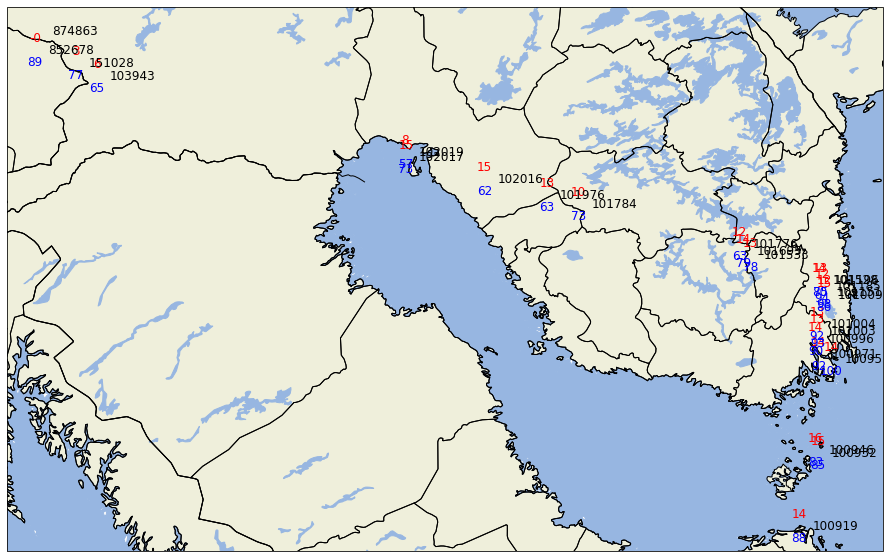

In [102]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=proj)

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

stationplot = StationPlot(ax, data.index.levels[2].values, data.index.levels[0].values,
                          clip_on=True, transform=ccrs.PlateCarree(), fontsize=12)
stationplot.plot_parameter(location="NW",parameter=data['1002'].values,color='red')
stationplot.plot_parameter(location="SW",parameter=data['3002'].values,color='blue')


stationplot.plot_text((2, 0),data.index.levels[1].values)

## Metpy calculation of dewpoint from relative humidity

In [31]:
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xrb

In [40]:
ds=fmi.data(parameters=[1002,3002],
            stationId=[101533],
            timeStart='2020-06-12',
            timeEnd='2020-07-03',
            timeZone='UTC',
            format='ds',
            varname='id')


INFO:start connecting to station 101533


In [41]:
temp = ds['1002']*units.degC
hum=ds['3002']*units.percent

In [42]:
mpcalc.dewpoint_from_relative_humidity(temp, hum)

<xarray.DataArray (time: 505, location: 1)>
<Quantity([[ 5.27186799]
 [ 4.51358133]
 [ 3.10520135]
 [ 2.65749656]
 [ 2.50903096]
 [ 2.86240144]
 [ 6.40354124]
 [ 7.86772804]
 [ 8.3326654 ]
 [ 5.62502216]
 [ 5.82004314]
 [ 5.90751352]
 [ 4.87650363]
 [ 2.71355351]
 [ 1.03941705]
 [ 1.55335417]
 [ 0.25840958]
 [-0.58016805]
 [-1.10462001]
 [ 0.22920189]
...
 [ 4.96186999]
 [ 6.26444118]
 [ 6.43030936]
 [ 6.54206554]
 [ 3.74643889]
 [ 2.03157588]
 [ 1.67686713]
 [ 2.58983461]
 [ 2.67325189]
 [ 0.36387038]
 [ 1.6971744 ]
 [ 1.58845925]
 [ 2.8893772 ]
 [ 1.93106069]
 [ 0.79748725]
 [ 0.96553357]
 [ 5.49480545]
 [ 5.71295151]
 [ 5.77667711]
 [ 8.40592166]], 'degree_Celsius')>
Coordinates:
  * time      (time) datetime64[ns] 2020-06-11T21:00:00 ... 2020-07-02T21:00:00
  * location  (location) int32 101533